In [1]:
import pandas as pd
import numpy as np
import scipy

data=pd.read_csv("train.csv")
data

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,2909,28,18,182,58,1350,210,197,117,...,0,0,0,0,0,0,0,0,0,2
1,1,2757,334,30,212,83,1384,137,184,177,...,0,0,0,0,0,0,0,0,0,2
2,2,3283,248,4,150,15,5601,211,243,170,...,0,0,0,0,0,0,1,0,0,1
3,3,3019,330,14,541,-101,1811,186,222,175,...,0,0,0,0,0,0,0,0,0,2
4,4,3039,340,20,474,74,3407,175,207,169,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2521,187,17,30,1,1099,220,250,158,...,0,0,0,0,0,0,0,0,0,6
99996,99996,2891,341,16,30,9,3774,186,215,167,...,0,0,0,0,0,0,0,0,0,2
99997,99997,2563,129,9,134,18,569,236,235,129,...,0,0,0,0,0,0,0,0,0,2
99998,99998,3322,238,14,153,32,2773,195,251,192,...,0,0,0,0,0,0,0,0,0,1


In [2]:
X_train=data.drop(columns=["Cover_Type"])
y_train=data['Cover_Type']


In [3]:
X_test=pd.read_csv("test.csv")
X_test.head(5)

,row_ID,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0,2767,66,17,210,18,1190,234,204,96,...,1,0,0,0,0,0,0,0,0,0
1,1,2724,160,19,60,4,1350,236,240,127,...,0,0,0,0,0,0,0,0,0,0
2,2,2360,65,7,127,21,1377,227,226,134,...,0,0,0,0,0,0,0,0,0,0
3,3,2995,45,4,285,30,5125,221,231,146,...,0,0,0,0,0,0,0,0,0,0
4,4,2400,106,27,150,63,342,253,196,51,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Supprimer les colonnes d'identification
X_test=X_test.drop(columns=["row_ID"])
X_train=X_train.drop(columns=['Unnamed: 0'])

In [5]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train,y_train)



In [11]:
y_train.value_counts()

Cover_Type
2    48676
1    36410
3     6273
7     3568
6     2967
5     1635
4      471
Name: count, dtype: int64

In [13]:
y_sm.value_counts()

Cover_Type
2    48676
1    48676
7    48676
4    48676
3    48676
6    48676
5    48676
Name: count, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split



XB_train, XB_test, yB_train, yB_test = train_test_split(X_train,y_train,train_size=0.75, random_state=42)
XS_train, XS_test, yS_train, yS_test = train_test_split(X_sm,y_sm,train_size=0.75,random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score


rf_SMOTE_model = RandomForestClassifier(random_state=42)
rf_BASE_model = RandomForestClassifier(random_state=42)

rf_BASE_model.fit(XB_train,yB_train)



rf_SMOTE_model.fit(XS_train,yS_train)


yB_test_prediction = rf_BASE_model.predict(XB_test)
yS_test_prediction = rf_SMOTE_model.predict(XS_test)
BASE_test_acc = accuracy_score(yB_test,yB_test_prediction)
SMOTE_test_acc = accuracy_score(yS_test,yS_test_prediction)
print(f"Base model test accuracy: {BASE_test_acc}")
print(f"SMOTE model test accuracy: {SMOTE_test_acc}")


Base model test accuracy: 0.90088
SMOTE model test accuracy: 0.9749010952889661


In [32]:
from sklearn.metrics import f1_score
print(f1_score(yB_test,yB_test_prediction, average="weighted"))
print(f1_score(yS_test,yS_test_prediction,average="weighted"))
#0.8994 vs 0.97478(SMOTE)

0.8994565201477261
0.9747787257559616


In [33]:
from sklearn.model_selection import cross_val_score, train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

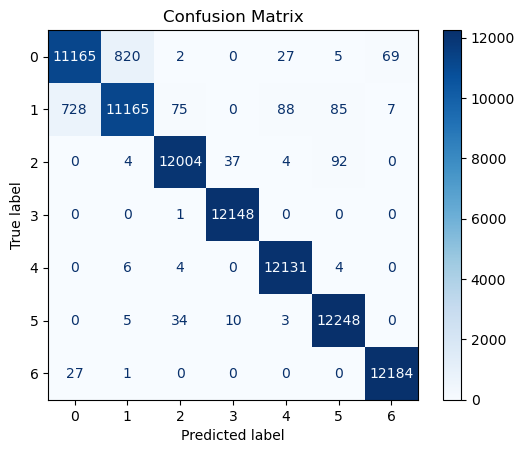

In [34]:

cm = confusion_matrix(yS_test, yS_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



In [35]:
print(classification_report(yS_test,yS_test_prediction))

              precision    recall  f1-score   support

           1       0.94      0.92      0.93     12088
           2       0.93      0.92      0.92     12148
           3       0.99      0.99      0.99     12141
           4       1.00      1.00      1.00     12149
           5       0.99      1.00      0.99     12145
           6       0.99      1.00      0.99     12300
           7       0.99      1.00      1.00     12212

    accuracy                           0.97     85183
   macro avg       0.97      0.97      0.97     85183
weighted avg       0.97      0.97      0.97     85183



In [36]:
print(classification_report(yB_test,yB_test_prediction))

              precision    recall  f1-score   support

           1       0.92      0.88      0.90      9056
           2       0.90      0.94      0.92     12236
           3       0.87      0.92      0.89      1540
           4       0.79      0.68      0.73        95
           5       0.88      0.51      0.64       440
           6       0.87      0.74      0.80       762
           7       0.93      0.87      0.90       871

    accuracy                           0.90     25000
   macro avg       0.88      0.79      0.83     25000
weighted avg       0.90      0.90      0.90     25000



In [37]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score


rf_best=RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=42)

In [38]:
rf_best.fit(X_sm,y_sm)

RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=42)

In [39]:
y_pred=rf_best.predict(X_test)



In [40]:
submission_df = pd.DataFrame({
    'row_ID': X_test.index,   
    'Cover_Type': y_pred      
})

#submission_df.to_csv('rf_smote.csv', index=False)

In [41]:
from joblib import load, dump
#Sauvegarder le modèle
#dump(rf_best, 'rf_smote.joblib')

In [42]:
rf_best

RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=42)

In [43]:
features_scores=pd.Series(rf_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)
features_scores

Elevation                             0.276894
Horizontal_Distance_To_Roadways       0.108570
Horizontal_Distance_To_Fire_Points    0.083685
Wilderness_Area4                      0.066860
Horizontal_Distance_To_Hydrology      0.055210
Vertical_Distance_To_Hydrology        0.040367
Hillshade_9am                         0.038205
Wilderness_Area1                      0.035768
Aspect                                0.034010
Hillshade_Noon                        0.030125
Hillshade_3pm                         0.029776
Wilderness_Area3                      0.027215
Slope                                 0.022709
Soil_Type10                           0.021610
Soil_Type38                           0.013796
Soil_Type39                           0.012869
Soil_Type3                            0.012432
Soil_Type4                            0.010290
Wilderness_Area2                      0.007643
Soil_Type30                           0.006790
Soil_Type29                           0.005962
Soil_Type40  